<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/XGBoost_Cancer_Prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Wisconsin (Diagnostic) Data Set
Predict whether the cancer is benign or malignant
================================================

About this Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Module Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.simplefilter(action="ignore", category=UserWarning)

## Dataset Import

Using the LendingClub loans dataset.

In [ ]:
# Read in the cancer.csv dataset into "df"
### BEGIN SOLUTION
from google.colab import drive
drive.mount('/content/drive')
df =  pd.read_csv("drive/MyDrive/Colab Notebooks/MIT XPro/cancer.csv", index_col= False )
### END SOLUTION

Mounted at /content/drive


In [ ]:
### BEGIN HIDDEN TESTS
df_ =  pd.read_csv("drive/MyDrive/Colab Notebooks/MIT XPro/cancer.csv", index_col= False )
assert(df.values.all() == df_.values.all())
### END HIDDEN TESTS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Observe the data
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
# Find the number of diagnosis for both M and B and normalize the result to get a precentage.
# Assign the output to "diagnosis"
### BEGIN SOLUTION
diagnosis = df.diagnosis.value_counts(normalize=True)
### END SOLUTION
print(diagnosis)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [ ]:
### BEGIN HIDDEN TESTS
diagnosis_ = df.diagnosis.value_counts(normalize=True)
assert(diagnosis.all() == diagnosis.all())
### END HIDDEN TESTS

In [ ]:
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
#  Drop id column
### BEGIN SOLUTION
df.drop("id",axis=1,inplace=True)
### END SOLUTION

In [ ]:
### BEGIN HIDDEN TESTS
df_.drop("id",axis=1,inplace=True)
assert(df.values.all() == df_.values.all())
### END HIDDEN TESTS

## Training and Test Datasets

Let's split the data 70/30 into a training set (which we will use to build models) and a test set (on which we will evaluate any model we build).

In [ ]:
# Set "X" to all independent variables and set "y" to the diagnosis variable
### BEGIN SOLUTION
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
### END SOLUTION

In [ ]:
### BEGIN HIDDEN TESTS
X_ = df_.drop(['diagnosis'], axis=1)
y_ = df_['diagnosis']
assert(X_.values.all() == X.values.all())
assert(y_.values.all() == y.values.all())
### END HIDDEN TESTS

In [ ]:

# Encode string class values as integers to avoid errors in newer versions of XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

In [ ]:
# Split data into training and test set: "X_train, X_test, y_train, y_test"
# Test size should be 0.3 with random_state set to 7
# Set "eval_set" to the combination of X_test and y_test
### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set=[(X_test, y_test)]
### END SOLUTION
print(X_train.shape, X_test.shape)


(398, 30) (171, 30)


In [ ]:
### BEGIN HIDDEN TESTS
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set_=[(X_test, y_test)]
assert(X_train.values.all() == X_train_.values.all())
assert(X_test.values.all() == X_test_.values.all())
assert(eval_set_ == eval_set)
### END HIDDEN TESTS

In [ ]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

#set "st" to the current datetime
### BEGIN SOLUTION
st = datetime.now()
### END SOLUTION

# Use xgboost.sklearn.XGBClassifier to create a model called "clf" with the following parameters:
#     objective: "binary:logistic"
#     learning_rate: 0.05
#     seed: 9616
#     max_depth: 20
#     gamma: 10
#     n_estimators: 500
### BEGIN SOLUTION
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.05,
    seed=9616,
    max_depth=20,
    gamma=10,
    early_stopping_rounds=20,
    eval_metric="auc",
    n_estimators=500)
### END SOLUTION

# Fit the model with training data. Also use the following parameters:
#     early_stopping_rounds: 20
#     eval_metric: "auc"
#     eval_set: eval_set
#     verbose: False
### BEGIN SOLUTION
clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
### END SOLUTION


print(datetime.now()-st)

# set "y_pred" to the clf predictions on the test dataset.
### BEGIN SOLUTION
y_pred = clf.predict(X_test)
### END SOLUTION

# Get the accuracy score of the model set the output to "accuracy".
### BEGIN SOLUTION
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
### END SOLUTION

print("Accuracy: %.10f%%" % (accuracy * 100.0))

# Get the ROC-AUC score for the model.
### BEGIN SOLUTION
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
### END SOLUTION

print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


Initializing xgboost.sklearn.XGBClassifier and starting training...
0:00:00.211185
Accuracy: 95.3216374269%
ROC-AUC: 94.1614420063%


In [ ]:
### BEGIN HIDDEN TESTS
print('Creating a grading model. This may take a minute...')

st_ = datetime.now()

clf_ = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.05,
    seed=9616,
    max_depth=20,
    gamma=10,
    early_stopping_rounds=20,
    eval_metric="auc",
    n_estimators=500)

clf_.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred_ = clf.predict(X_test)

accuracy_ = accuracy_score(np.array(y_test).flatten(), y_pred)

accuracy_per_roc_auc_ = roc_auc_score(np.array(y_test).flatten(), y_pred)

assert(accuracy_ == accuracy)
assert(accuracy_per_roc_auc_ == accuracy_per_roc_auc)
assert(y_pred_.all() == y_pred.all())
### END HIDDEN TESTS



Creating a grading model. This may take a minute...


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

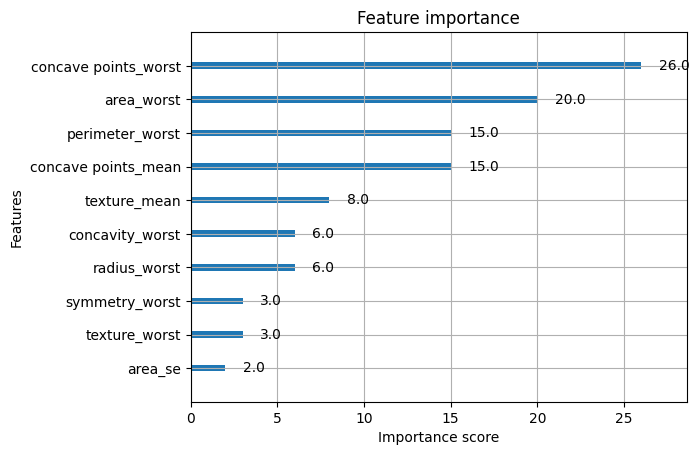

In [ ]:
xgboost.plot_importance(clf)